# Passive degrees of freedom



Passive dofs!

In [1]:
from blop.utils import prepare_re_env

%run -i $prepare_re_env.__file__ --db-type=temp

running iteration 1 / 1


Transient Scan ID: 1     Time: 2024-02-01 21:50:52
Persistent Unique Scan ID: 'dcf815dc-368e-4e10-a8f1-0acede969049'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |         x3 |  brownian1 |  brownian2 |
+-----------+------------+------------+------------+------------+------------+------------+
|         1 | 21:50:52.2 |      0.140 |     -0.764 |      0.000 |      0.116 |      0.070 |


|         2 | 21:50:52.8 |     -1.351 |      1.005 |      0.000 |     -0.049 |     -0.053 |


|         3 | 21:50:53.2 |     -3.198 |      1.655 |      0.000 |     -0.055 |      0.439 |


|         4 | 21:50:53.7 |     -4.953 |     -0.158 |      0.000 |     -0.227 |      0.865 |


|         5 | 21:50:54.1 |     -4.345 |      3.510 |      0.000 |     -0.108 |      0.939 |


|         6 | 21:50:54.6 |     -1.111 |      4.150 |      0.000 |     -0.262 |      1.176 |


|         7 | 21:50:55.0 |      0.718 |      3.061 |      0.000 |     -0.346 |      1.081 |


|         8 | 21:50:55.4 |      1.739 |      2.417 |      0.000 |     -0.379 |      1.173 |


|         9 | 21:50:55.9 |      3.796 |      4.911 |      0.000 |     -0.507 |      0.956 |


|        10 | 21:50:56.3 |      3.742 |      0.555 |      0.000 |     -0.448 |      1.021 |


|        11 | 21:50:56.8 |      4.408 |     -1.266 |      0.000 |     -0.214 |      0.860 |


|        12 | 21:50:57.2 |      3.056 |     -3.278 |      0.000 |     -0.198 |      1.238 |


|        13 | 21:50:57.6 |      2.401 |     -3.752 |      0.000 |     -0.262 |      1.066 |


|        14 | 21:50:58.0 |     -0.528 |     -2.184 |      0.000 |     -0.168 |      0.823 |


|        15 | 21:50:58.5 |     -2.007 |     -2.672 |      0.000 |      0.100 |      0.344 |


|        16 | 21:50:58.9 |     -2.507 |     -4.670 |      0.000 |      0.058 |      0.260 |


+-----------+------------+------------+------------+------------+------------+------------+
generator list_scan ['dcf815dc'] (scan num: 1)


/usr/share/miniconda3/envs/blop-py3.10/lib/python3.10/site-packages/bluesky/callbacks/fitting.py:167: RuntimeWarning: invalid value encountered in scalar divide
  np.sum(input * grids[dir].astype(float), labels, index) / normalizer


trained model 'himmelblau' in 228 ms


('dcf815dc-368e-4e10-a8f1-0acede969049',)

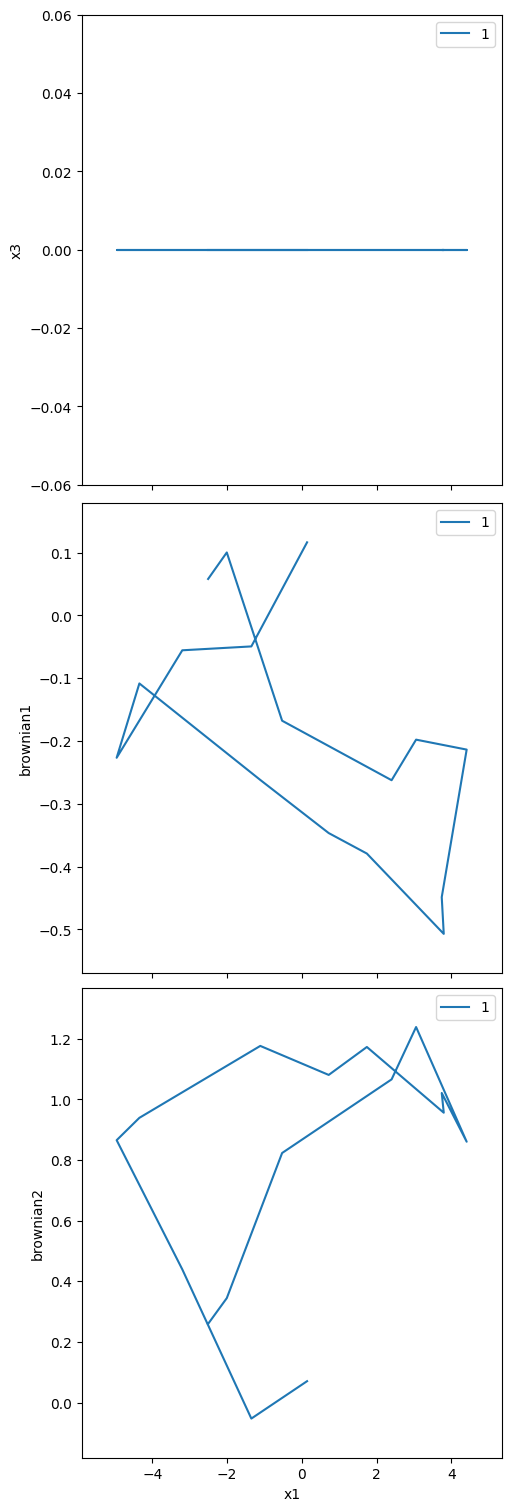

In [2]:
from blop.utils import functions
from blop import DOF, Agent, Objective
from blop.dofs import BrownianMotion


dofs = [
    DOF(name="x1", search_bounds=(-5.0, 5.0)),
    DOF(name="x2", search_bounds=(-5.0, 5.0)),
    DOF(name="x3", search_bounds=(-5.0, 5.0), active=False),
    DOF(device=BrownianMotion(name="brownian1"), read_only=True),
    DOF(device=BrownianMotion(name="brownian2"), read_only=True, active=False),
]

objectives = [
    Objective(name="himmelblau", target="min"),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=functions.constrained_himmelblau_digestion,
    db=db,
    verbose=True,
    tolerate_acquisition_errors=False,
)

RE(agent.learn("qr", n=16))

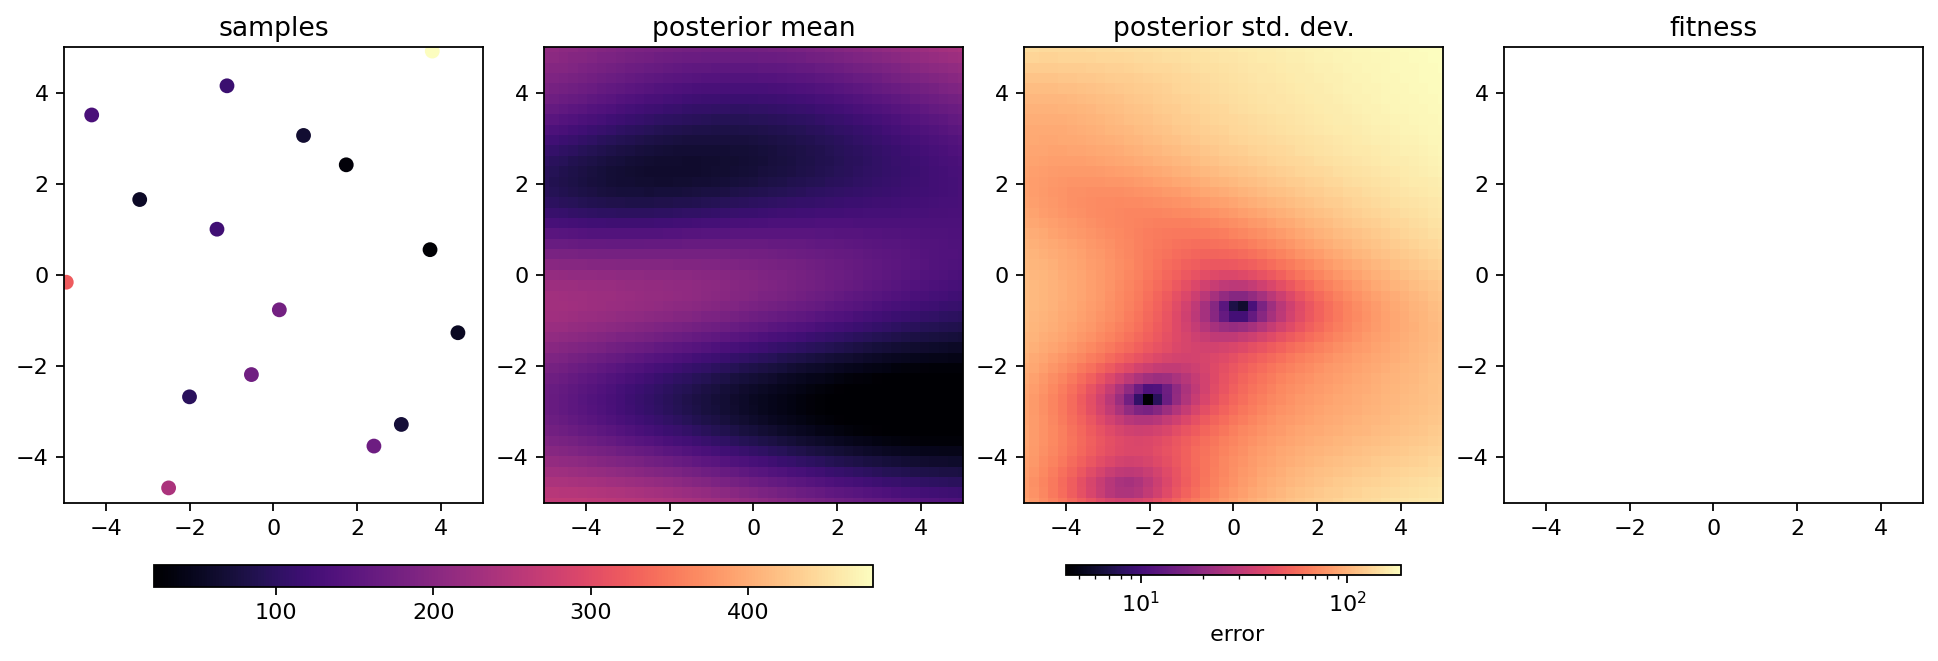

In [3]:
agent.plot_objectives()